In [90]:
# Load necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
from plotnine import *

# Visualization modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Module for saving model
import joblib

# Set seed for reproducibility 
SEED = 42

In [91]:
# Load the dataset
#df = pd.read_csv('transactions_train.csv')
df = pd.read_csv('transactions_train.csv')
print(f"Original Shape: {df.shape}")
df.head(10)

Original Shape: (6351193, 10)


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [92]:
#info details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [93]:
#Check for columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [94]:
# Check how many fraudulent transactions there are in our data
df.isFraud.value_counts()

isFraud
0    6343476
1       7717
Name: count, dtype: int64

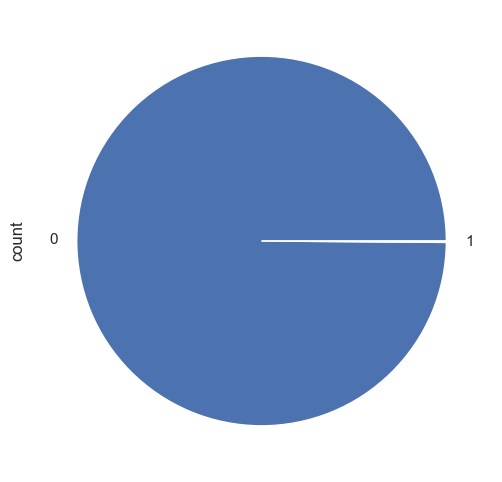

<Figure size 640x480 with 0 Axes>

In [95]:
#
plt.figure(figsize=(9, 6))
df['isFraud'].value_counts().plot.pie()
plt.show()

plt.savefig("Fradulent&Non-Fradulent.png", dpi=300, bbox_inches='tight')


In [96]:
# Check if we have null values 
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [97]:
#checking how many rows and columns we have
df.shape

(6351193, 10)

In [98]:
#percentage of fraudulent transactions in dataset
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

np.float64(0.12)

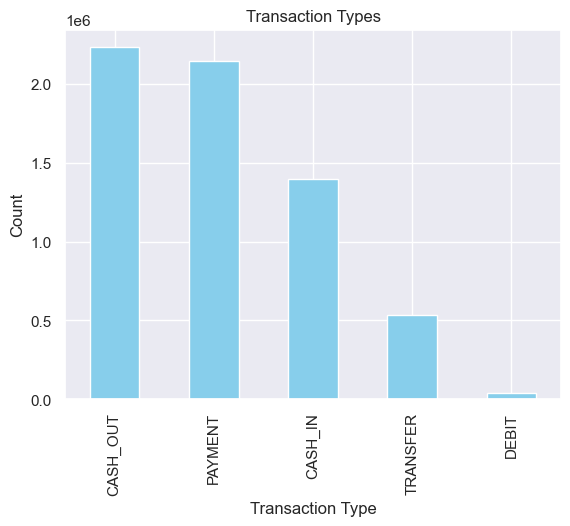

<Figure size 640x480 with 0 Axes>

In [99]:
#Visualising the transaction types
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color = "skyblue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

plt.savefig("Transaction Types", dpi=300, bbox_inches='tight')


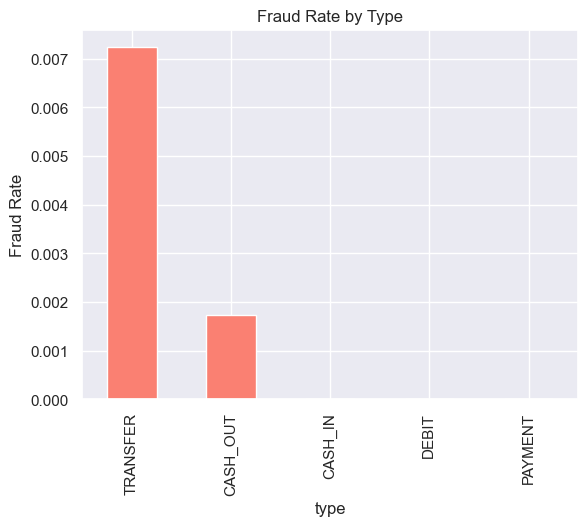

<Figure size 640x480 with 0 Axes>

In [100]:
#Fraud rates by type

fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

plt.savefig("Fraud Rate by Type.png", dpi=300, bbox_inches='tight')


In [101]:
#Amount statistics

df["amount"].describe().astype(int)

count     6351193
mean       179815
std        603630
min             0
25%         13388
50%         74864
75%        208715
max      92445516
Name: amount, dtype: int64

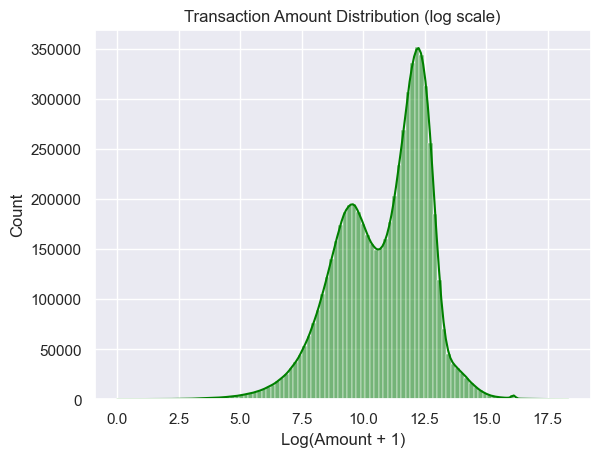

<Figure size 640x480 with 0 Axes>

In [102]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

plt.savefig("Histogram.png", dpi=300, bbox_inches='tight')


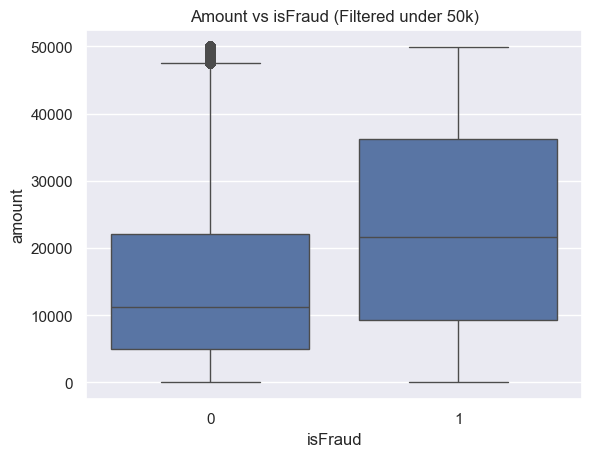

<Figure size 640x480 with 0 Axes>

In [103]:
#Relationship of the amount and fraud

sns.boxplot(data= df[df["amount"] < 50000], x= "isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

plt.savefig("Boxplot.png", dpi=300, bbox_inches='tight')


In [104]:
#checking for column names

df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [105]:
#
df["balanceDiffOrig"] = df["oldbalanceOrig"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [106]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1396834)

In [107]:
(df["balanceDiffDest"] < 0).sum()

np.int64(1236956)

In [108]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0.0


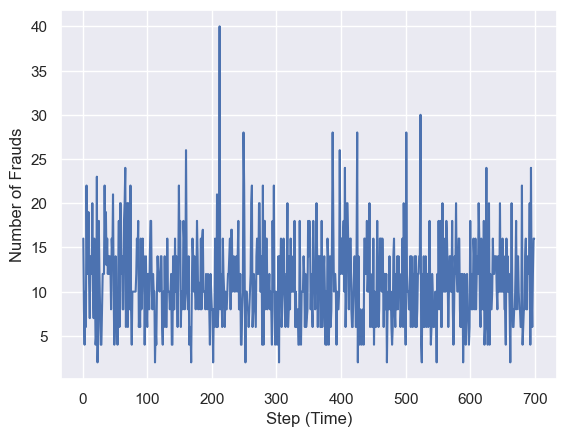

In [109]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.grid(True)
plt.show()

In [110]:
df.drop(columns="step", inplace=True)

In [111]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrig', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [112]:
df.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,11668.14,0.0


In [113]:
#Customers who make the highest transactions
top_senders = df["nameOrig"].value_counts().head(10)

In [114]:
top_senders

nameOrig
C1677795071    3
C724452879     3
C1999539787    3
C2051359467    3
C545315117     3
C1530544995    3
C1902386530    3
C400299098     3
C1832548028    3
C1976208114    3
Name: count, dtype: int64

In [115]:
#Customers who receive the highest
top_receivers = df["nameDest"].value_counts().head(10)

In [116]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [117]:
#Fraud users
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [118]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [119]:
#Fraud Types
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [120]:
#Fraud Types
fraud_types["type"].value_counts()

type
CASH_OUT    2233369
TRANSFER     531817
Name: count, dtype: int64

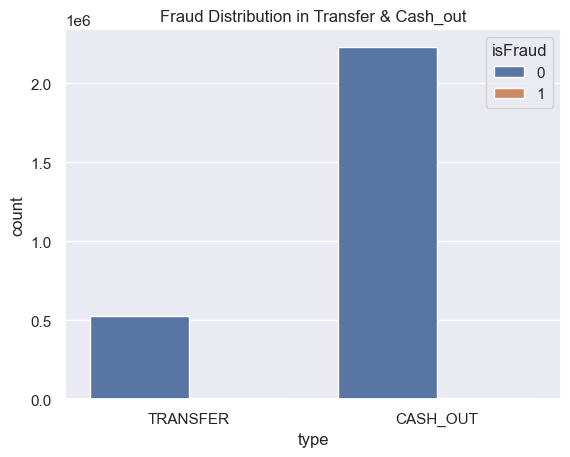

<Figure size 640x480 with 0 Axes>

In [121]:
#Fraud distribution
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer & Cash_out")
plt.show()

plt.savefig("Fraud Distribution.png", dpi=300, bbox_inches='tight')


In [122]:
#Correlation Matrix

corr = df[["amount", "oldbalanceOrig", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [123]:
corr

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.003543,-0.008153,0.294792,0.460065,0.073346
oldbalanceOrig,-0.003543,1.000000,0.998857,0.066301,0.042019,0.009226
newbalanceOrig,-0.008153,0.998857,1.000000,0.067852,0.041853,-0.008322
oldbalanceDest,0.294792,0.066301,0.067852,1.000000,0.976550,-0.005657
newbalanceDest,0.460065,0.042019,0.041853,0.976550,1.000000,0.000496
isFraud,0.073346,0.009226,-0.008322,-0.005657,0.000496,1.000000


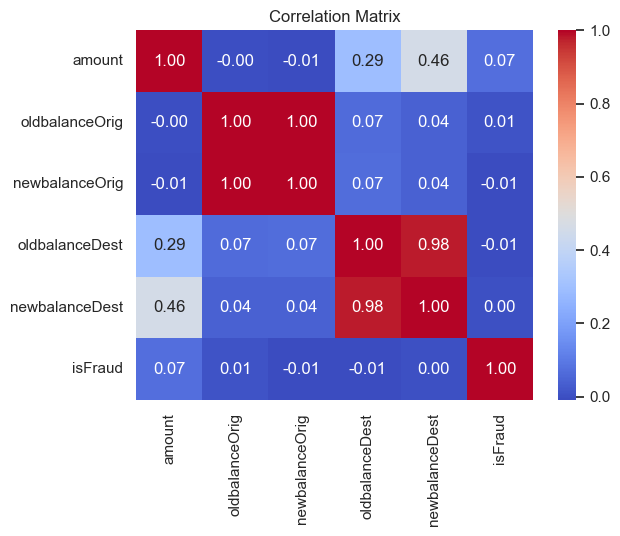

<Figure size 640x480 with 0 Axes>

In [124]:
#Visualising 
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')


In [125]:
#Customers who go to zero after transfer
zero_after_transfer = df[
(df["oldbalanceOrig"]>0) &
(df["newbalanceOrig"]>0) &
(df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [126]:
len(zero_after_transfer)

273056

In [127]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
58,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,62610.80,7866.29
70,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.00,0.00,0,47458.86,-52120.00
71,CASH_OUT,136872.92,C1533123860,162075.98,25203.05,C766572210,217806.00,0.00,0,136872.93,-217806.00
516,TRANSFER,7206.33,C478139423,24932.00,17725.67,C1032986144,21308.00,18161.79,0,7206.33,-3146.21
665,CASH_OUT,227768.63,C1445424568,1011466.31,783697.68,C1023714065,530123.48,1412484.09,0,227768.63,882360.61
